In [1]:
!pip install git+https://github.com/octosport/octopy.git

  Cloning https://github.com/octosport/octopy.git to /tmp/pip-req-build-xp9dbz13
  Running command git clone -q https://github.com/octosport/octopy.git /tmp/pip-req-build-xp9dbz13
     |████████████████████████████████| 28.5 MB 42 kB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Created wheel for octopy: filename=octopy-1.0.0-py3-none-any.whl size=10613 sha256=9a30cbdd4eeea5c03e384ebf7adc7493067738fcf5665b0a82779bd5f0230198
  Stored in directory: /tmp/pip-ephem-wheel-cache-3b7tf1ra/wheels/fe/92/b1/51d04bb184b9442db5fee66ec3acfdc85798cc4423d9fe40a0
Successfully built octopy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
ERROR: pip's dependency resolver does not currently take i

In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from octopy.elo import dataset
from octopy.elo import elo

#get the data
data = pd.read_csv('https://raw.githubusercontent.com/octosport/octopy/master/data/epl.csv')

#format the data
elo_data = dataset.EloDataset(valid_date= '2019-06-01',test_date= '2020-06-01',time= data['date'])

#split the data
elo_data.split_train_test(data[['home','away']].values,data[['home_goals','away_goals']].values)

#build the model and train
model = elo.EloRatingNet(elo_data.n_teams_)
model.optimise(elo_data,learning_rate=0.1)

dataset split using date: train size 1140, validation size 288, test size 492


  0%|          | 0/10000 [00:00<?, ?it/s]

train_loss: 1.0173, valid_loss: 1.0619, test_loss: 1.0358
train_loss: 0.9710, valid_loss: 1.0139, test_loss: 1.0159
train_loss: 0.9703, valid_loss: 1.0134, test_loss: 1.0155
train_loss: 0.9696, valid_loss: 1.0130, test_loss: 1.0152
train_loss: 0.9689, valid_loss: 1.0126, test_loss: 1.0148
train_loss: 0.9682, valid_loss: 1.0121, test_loss: 1.0145
train_loss: 0.9674, valid_loss: 1.0116, test_loss: 1.0140
train_loss: 0.9666, valid_loss: 1.0111, test_loss: 1.0136
train_loss: 0.9657, valid_loss: 1.0105, test_loss: 1.0131
train_loss: 0.9647, valid_loss: 1.0099, test_loss: 1.0125
train_loss: 0.9636, valid_loss: 1.0092, test_loss: 1.0119
train_loss: 0.9625, valid_loss: 1.0085, test_loss: 1.0112
train_loss: 0.9612, valid_loss: 1.0077, test_loss: 1.0105
train_loss: 0.9599, valid_loss: 1.0069, test_loss: 1.0096
train_loss: 0.9584, valid_loss: 1.0061, test_loss: 1.0086
train_loss: 0.9568, valid_loss: 1.0053, test_loss: 1.0076
train_loss: 0.9551, valid_loss: 1.0045, test_loss: 1.0064
train_loss: 0.

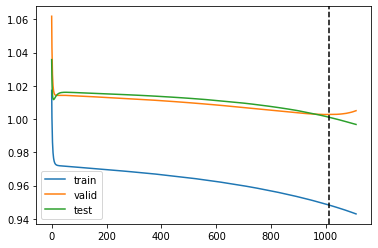

In [5]:
#plot the path loss
pd.DataFrame(model.loss_path_,columns=['train','valid','test']).plot()
plt.axvline(x=model.best_params_['n_iter'],c='black',linestyle='--')

In [11]:
last_rating = pd.DataFrame(model.output_['carry']['rating'],index=elo_data.le_.classes_,columns=['last rating']) .sort_values('last rating',ascending=False)
last_rating
 

,last rating
Manchester City,1001.166931
Liverpool,1001.047852
Chelsea,1000.845276
Manchester United,1000.841370
Tottenham Hotspur,1000.777161
Arsenal,1000.671082
Leicester City,1000.610413
Everton,1000.579224
West Ham United,1000.553589
Wolverhampton,1000.498535


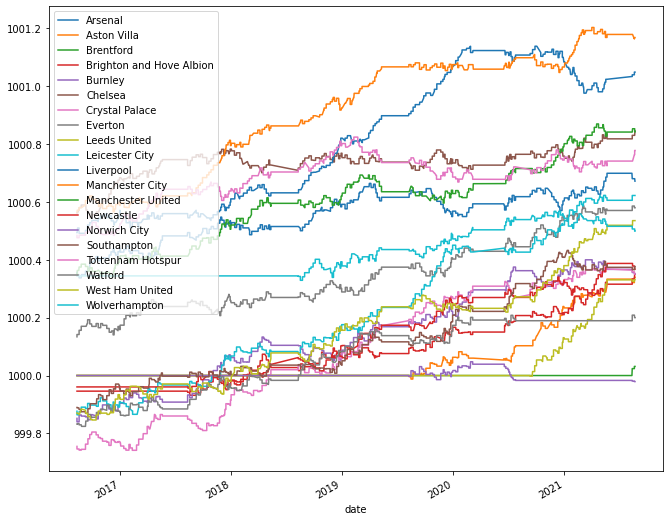

In [16]:
import numpy as np
rating_history = pd.DataFrame(model.output_['rating'],columns=elo_data.le_.classes_,index=pd.DatetimeIndex(elo_data.time)) [  np.unique(np.concatenate(data.loc[data.date>'2021-08-01',['home','away']].values))]
rating_history.plot(figsize=(11, 9.5))

In [27]:
pd.Series(model.predict_proba('Arsenal','Norwich City'))

Arsenal          0.6680646
Draw            0.18850368
Norwich City    0.14343174
dtype: object